#Data Set Overivew

The tutorial uses the [Iowa Liquor Retails Sales](https://console.cloud.google.com/marketplace/details/iowa-department-of-commerce/iowa-liquor-sales). We will be using the dataset to predict future sales for one of the stores

This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012. 

The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

In [509]:
import seaborn as sns

In [365]:
df = pd.read_csv("https://raw.githubusercontent.com/neherlab/covid19_scenarios/master/data/case-counts/unitedstates/USA-Pennsylvania.tsv",header=3,sep='\t',parse_dates=['time'])

In [366]:
df.index=df['time']
df['cases_log10'] = df['cases'].apply(np.log10)
df['cases_diff'] = df['cases'].diff()
df['cases_diff_log10'] = df['cases_diff'].apply(np.log10)

<AxesSubplot:xlabel='time', ylabel='cases_log10'>

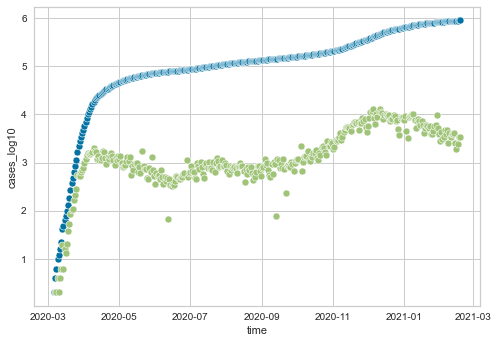

In [367]:
sns.scatterplot(x='time',y='cases_log10',data=df)
sns.scatterplot(x='time',y='cases_diff_log10',data=df)

In [399]:
positives = pd.DataFrame(pd.Series({
    "2021-02-20":132,
    "2021-02-13":92,
    "2021-02-06":29,
    "2021-01-30":16,
    "2021-01-23":5,
    "2021-01-16":5,
    "2021-01-09":9,
},name="positives"))

In [490]:
positives_df = pd.DataFrame(pd.Series(
    np.arange(
        start=pd.Timestamp("2021-01-03"),
        stop=pd.Timestamp("2021-02-20"),
        step=np.timedelta64(1,'D')
    ),name='time'))

In [491]:
positives_df.index = positives_df['time']

In [492]:
positives = pd.DataFrame(pd.Series({
    "2021-01-03":1,
    "2021-01-05":5,
    "2021-01-06":3,
    "2021-01-11":2,
    "2021-01-12":1,
    "2021-01-15":2,
    "2021-01-19":1,
    "2021-01-20":2,
    "2021-01-22":2,
    "2021-01-25":2,
    "2021-01-26":1,
    "2021-01-27":1,
    "2021-01-28":4,
    "2021-01-29":6,
    "2021-01-30":6,
    "2021-01-31":1,
    "2021-02-01":2,
    "2021-02-03":5,
    "2021-02-04":17,
    "2021-02-05":3,
    "2021-02-05":1,
    "2021-02-06":3,
    "2021-02-09":9,
    "2021-02-10":18,
    "2021-02-11":28,
    "2021-02-12":30,
    "2021-02-13":4,
    "2021-02-14":16,
    "2021-02-15":3,
    "2021-02-16":43,
    "2021-02-17":23,
    "2021-02-18":18,
    "2021-02-19":20,
    "2021-02-20":9
},name="positives"))

In [493]:
positives.index = pd.to_datetime(positives.index)

In [494]:
positives = positives_df.join(positives).fillna(0)

In [496]:
positives = positives.sort_index(ascending=True)

In [497]:
positives['cases'] = positives['positives'].cumsum()

In [500]:
positives[['time','cases']].to_csv("bucknell.csv",index=False)

In [502]:
positives['positives_log10'] = positives['positives'].apply(np.log10)

In [503]:
positives['cases_log10'] = positives['cases'].apply(np.log10)

In [505]:
positives.to_csv("bucknell_full.csv")

<AxesSubplot:xlabel='day', ylabel='positives_log10'>

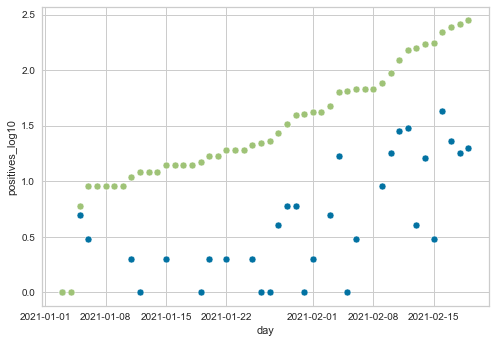

In [464]:
sns.scatterplot(x='day',y='positives_log10',data=positives)
sns.scatterplot(x='day',y='positives_cumulative_log10',data=positives)

In [510]:

# importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf



# Reading Data


## Using a direct link
A version of this dataset is also saved on my google drive. We can use it to pull the dataset


In [234]:
import pandas as pd

url = 'https://drive.google.com/file/d/1g3UG_SWLEqn4rMuYCpTHqPlF0vnIDRDB/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df2 = pd.read_csv(path)

In [235]:
path #save this path, just in case

'https://drive.google.com/uc?export=download&id=1g3UG_SWLEqn4rMuYCpTHqPlF0vnIDRDB'

# Data Overview

In [236]:
df2.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19309700006,2019-05-13,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,...,5486,Macallan 12 Yr Single Malt Scotch,12,750,34.99,52.49,84,4409.16,63.0,16.64
1,INV-15347200002,2018-10-29,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,...,27145,WhistlePig Old World 12YR,6,750,64.17,96.26,30,2887.80,22.5,5.94
2,INV-11117400006,2018-03-26,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,...,904955,1921 Tequila Reposado,6,750,26.50,39.75,12,477.00,9.0,2.38
3,INV-10206700012,2018-02-05,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,...,5486,Macallan 12 Yr Single Malt Scotch,12,750,34.99,52.49,12,566.88,9.0,2.38
4,INV-11743500040,2018-04-26,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,...,27027,Cody Road Rye,6,750,19.17,28.76,6,172.56,4.5,1.19


In [237]:
df2_ds = df2[['date','sale_dollars']] # selecting the needed columns

In [239]:
df2_ds=df2_ds.sort_index(axis=0)

In [240]:
df2_ds.tail(5)

,date,sale_dollars
50522,2019-12-09,1379.88
50523,2019-11-25,148.50
50524,2019-10-24,119.28
50525,2019-10-17,119.28
50526,2019-10-21,279.00


In [241]:
aggregated=df2_ds.groupby('date',as_index=True).sum()

In [242]:
aggregated

,sale_dollars
date,
2018-01-03,10639.43
2018-01-04,105307.95
2018-01-05,10526.40
2018-01-08,65236.68
2018-01-11,55396.46
...,...
2020-07-21,22054.44
2020-07-23,79001.99
2020-07-27,59207.67


In [182]:
print(min(aggregated.index))
print(max(aggregated.index))

2018-01-03
2020-07-30


In [243]:
aggregated.index=pd.to_datetime(aggregated.index)

#Create Fetaures
There are multiple ways of creating features, however, we will explore simpler ones - There are a few others, which I have commented for now

In [184]:
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['flag'] = pd.Series(np.where(df['date'] >= np.datetime64('2020-03-03'), 1, 0), index=df.index) #flag for COVID-19
    #df['rolling_mean_7'] = df['sale_dollars'].shift(7).rolling(window=7).mean()
    #df['lag_7'] = df['sale_dollars'].shift(7)
    #df['lag_15']=df['sale_dollars'].shift(15)
    #df['lag_last_year']=df['sale_dollars'].shift(52).rolling(window=15).mean() 
    X = df[['dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','flag','sale_dollars']]
    X.index=df.index
    return X

In [185]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

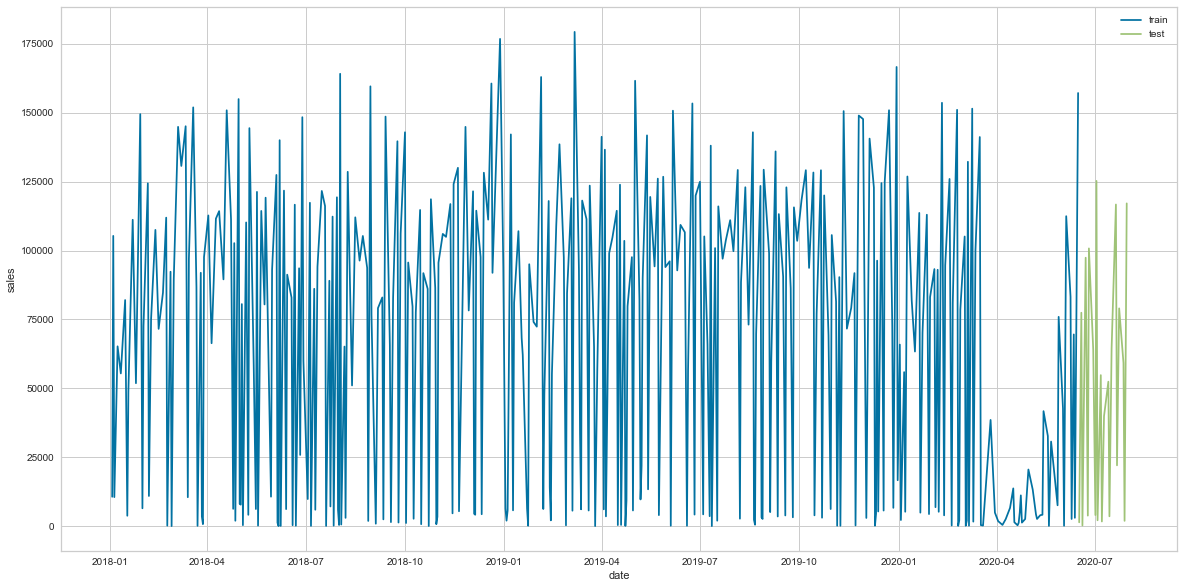

In [186]:
aggregated=create_features(aggregated)
train, test = split_data(aggregated, '2020-06-15') # splitting the data for training before 15th June

plt.figure(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('sales')
plt.plot(train.index,train['sale_dollars'],label='train')
plt.plot(test.index,test['sale_dollars'],label='test')
plt.legend()
plt.show()


In [187]:
for col in train.select_dtypes(np.number).columns:
    low=train[col].quantile(0.0001)
    high=train[col].quantile(0.9999)
    train[col] = train[col].clip(lower=low,upper=high)

There is a lot of variation within the date, also, the dates are not continous, that is, there are gaps - we can do two things here, impute missing date or let it be. 

A major reason we will not create missing dates is because we are considering this data for predictive modeling rather than time series forecasting - hence the data is not depenent on the immediate past but the relationship of the features with sales over time

# Run PyCaret

In [189]:
from pycaret.regression import *

Setting up the model is extremely easy

In [191]:
reg = setup(
    data = train, 
    test_data=test,
    target = 'sale_dollars',
    imputation_type= 'iterative',
    categorical_features = ['dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','flag'], 
    transformation = True,
    transform_target = True, 
    combine_rare_levels = True,
    rare_level_threshold = 0.1,
    remove_multicollinearity = True,
    remove_outliers=True,
    multicollinearity_threshold = 0.95, 
    silent = True,
    use_gpu = True
)

,Description,Value
0,session_id,2946
1,Target,sale_dollars
2,Original Data,"(385, 9)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(365, 178)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['dayofweek',
                                                            'quarter', 'month',
                                                            'year', 'dayofyear',
                                                            'dayofmonth',
                                                            'weekofyear',
                                                            'flag'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='sale_dollars',
                                      time_features=[])),
                ('imputer',
                 Itera

As a data scientist, I can't emphasize more on the usefulness of the function below - instead of pulling every single model, we just need one line to compare 20 different models! **This is insane!**

In [192]:
# returns best models - takes a little time to run
top3=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,28385.4736,1630943920.1388,39693.3028,0.3851,1.6150,80.4560,0.1500
rf,Random Forest Regressor,25736.0442,1584905576.7710,37305.1406,0.3810,1.5278,37.8807,0.5690
et,Extra Trees Regressor,27471.9490,1746641512.0166,39857.4238,0.3162,1.7652,41.7352,0.5790
lightgbm,Light Gradient Boosting Machine,28139.5247,1791650344.2730,40249.0080,0.3056,1.6375,72.5408,0.5410
ada,AdaBoost Regressor,32805.8505,2025246077.7382,44423.6231,0.2394,1.6438,51.4881,0.0590
dt,Decision Tree Regressor,29641.0337,2013172643.8059,42967.7703,0.2198,1.9321,41.0526,0.0220
knn,K Neighbors Regressor,38728.2197,2371851995.8038,48064.7525,0.1042,2.1877,142.1739,0.0390
huber,Huber Regressor,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1580
xgboost,Extreme Gradient Boosting,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
lasso,Lasso Regression,53866.2199,3553115212.8000,59408.6930,-0.2974,2.3805,396.4003,0.0330


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=BayesianRidge(alpha_1=1e-06,
                                                        alpha_2=1e-06,
                                                        alpha_init=None,
                                                        compute_score=False,
                                                        copy_X=True,
                                               

In [196]:
score_grid = pull()

In [224]:
base = {}
tuned = {}
for mod in score_grid.index[:3]:    
    base[mod] = create_model(mod)    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21447.0012,766448280.2632,27684.8023,0.6842,1.2496,3.3060
1,18603.2476,913671763.7013,30227.0039,0.6986,1.8510,306.9702
2,27956.7471,1499244512.3071,38720.0789,0.4796,1.7420,1.3429
3,27941.8454,2121558825.1249,46060.3824,0.2506,2.0531,6.1105
4,24585.1807,1156424952.9013,34006.2487,0.5897,2.0509,2.2839
5,20473.0043,997397762.4279,31581.6048,0.6510,1.5159,16.1776
6,26272.4320,1466770490.0934,38298.4398,0.4472,1.8555,17.6271
7,25966.8549,1526568536.0372,39071.3263,0.4665,1.2845,3.9882
8,24872.6573,1485367433.5540,38540.4649,0.4804,1.3767,12.0893
9,56600.5194,5532962563.7554,74383.8865,-1.5856,2.6729,47.4563


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion

In [226]:
base

{'br': PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                 compute_score=False, copy_X=True,
                                 fit_intercept=True, lambda_1=1e-06,
                                 lambda_2=1e-06, lambda_init=None, n_iter=300,
                                 normalize=False,
                                 power_transformer_method='box-cox',
                                 power_transformer_standardize=True,
                                 regressor=BayesianRidge(alpha_1=1e-06,
                                                         alpha_2=1e-06,
                                                         alpha_init=None,
                                                         compute_score=False,
                                                         copy_X=True,
                                                         fit_intercept=True,
                                                         lambda_1=1e

In [229]:
tuned={}
for mod in base:
    tuned[mod] = tune_model(base[mod])

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=BayesianRidge(alpha_1=1e-06,
                                                        alpha_2=1e-06,
                                                        alpha_init=None,
                                                        compute_score=False,
                                                        copy_X=True,
                                                        fit_intercept=True,
                    

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:12:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Bayesian Ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Bayesian Ridge
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Creating baseline model

In [96]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26215.4839,1407912947.9601,37522.1661,0.3210,0.8507,0.3391
1,24195.2411,1246819429.5571,35310.3304,0.5336,1.0771,0.9777
2,22082.7058,939250000.0122,30647.1858,0.6757,1.0752,4.6473
3,13202.4427,377612528.6807,19432.2549,0.8139,1.5591,8.4914
4,33522.5778,2148106315.3502,46347.6679,-0.0407,1.5902,4.7554
5,26084.8930,1317291596.3371,36294.5119,0.3802,0.9282,2.7460
6,22534.7257,1672473876.2800,40895.8907,0.4093,1.9701,12.5102
7,20519.5327,1109694865.0949,33312.0829,0.7198,1.5239,31.0691
8,18796.1717,1056305989.2460,32500.8614,0.6546,1.9689,95.4810
9,23773.0773,1085945099.5372,32953.6811,0.6607,1.2966,3.0292


Being able to tune seamlessly and hardly writing a line is extremely useful

In [97]:
tuned_lightgbm = tune_model(lightgbm) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27330.6513,1417474552.1253,37649.3632,0.3164,0.8210,0.4434
1,21400.8412,938059218.9644,30627.7524,0.6491,1.0425,1.9662
2,19447.7313,709897564.8254,26643.9030,0.7549,1.0703,5.1769
3,13355.3704,458361949.6097,21409.3893,0.7741,1.8044,9.9249
4,32455.1509,1897032202.4774,43554.9332,0.0809,1.5847,7.0508
5,28690.3695,1302233950.9859,36086.4788,0.3873,1.1388,8.5949
6,26683.1991,1894661106.1010,43527.7050,0.3308,2.0203,11.9057
7,27913.9467,1596964198.1600,39962.0345,0.5967,1.6124,30.2175
8,20641.9513,1248760756.7798,35337.8092,0.5916,1.9653,48.3350
9,22902.7173,1210174605.2757,34787.5639,0.6219,1.2631,6.7533


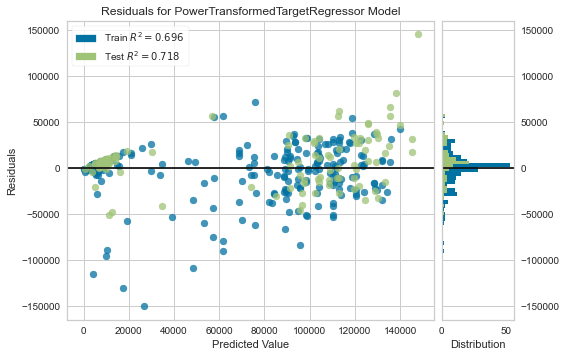

In [98]:
plot_model(lightgbm)

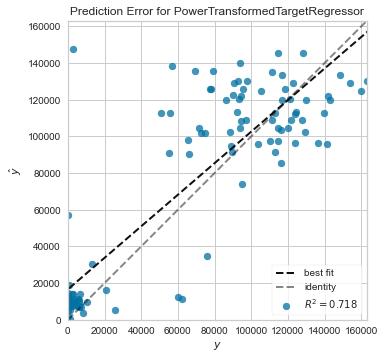

In [99]:
plot_model(lightgbm, plot = 'error')

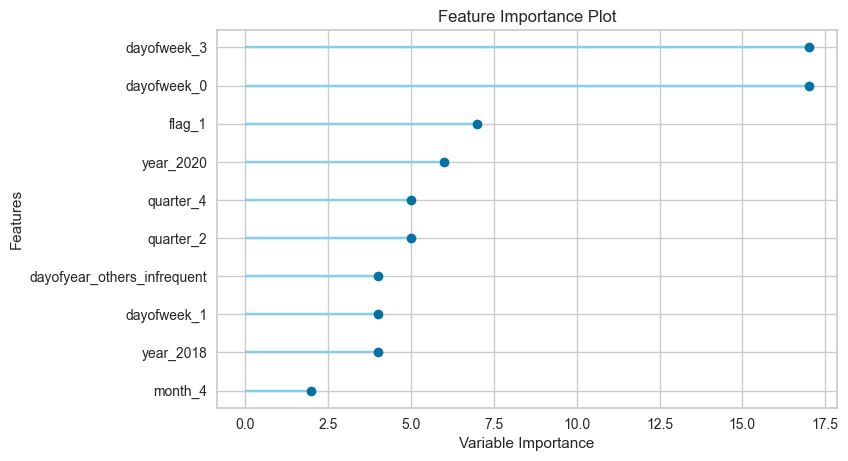

In [100]:
plot_model(tuned_lightgbm, plot='feature') # looks like COVID-19 has played a huge role in sales

In [101]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,21363.0351,800907222.5696,28300.3043,0.7203,2.1195,913952.8634


,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,quarter_1,quarter_2,quarter_3,quarter_4,month_1,...,weekofyear_51.0,weekofyear_52.0,weekofyear_6.0,weekofyear_7.0,weekofyear_8.0,weekofyear_9.0,weekofyear_others_infrequent,flag_1,sale_dollars,Label
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56615.269531,82679.666703
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13245.660156,46703.660469
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,127426.789062,91538.708228
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6197.080078,17383.407897
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,97455.570312,104952.145691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,114362.937500,91538.708228
112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.520000,11619.979498
113,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,123556.078125,84297.811587
114,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1202.640015,347.368750


In [102]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [103]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

PowerTransformedTargetRegressor(bagging_fraction=0.6, bagging_freq=2,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=21,
                                min_child_weight=0.001, min_split_gain=0.2,
                                n_estimators=250, n_jobs=-1, num_leaves=60,
                                objective=None,
                                power_transformer_method='...
                                                        importance_type='split',
                                                        learning_rate=0.15,
                                                        max_depth=-1,
                                                        min_child_samples=21,
                                                        min_child_wei

In [104]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17674.6852,654911104.1774,25591.2310,0.7713,1.7593,427570.9957


In [105]:
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 #removing any negative values

In [106]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("Date")
    plt.ylabel("Sales (Dollar)")
    plt.legend()

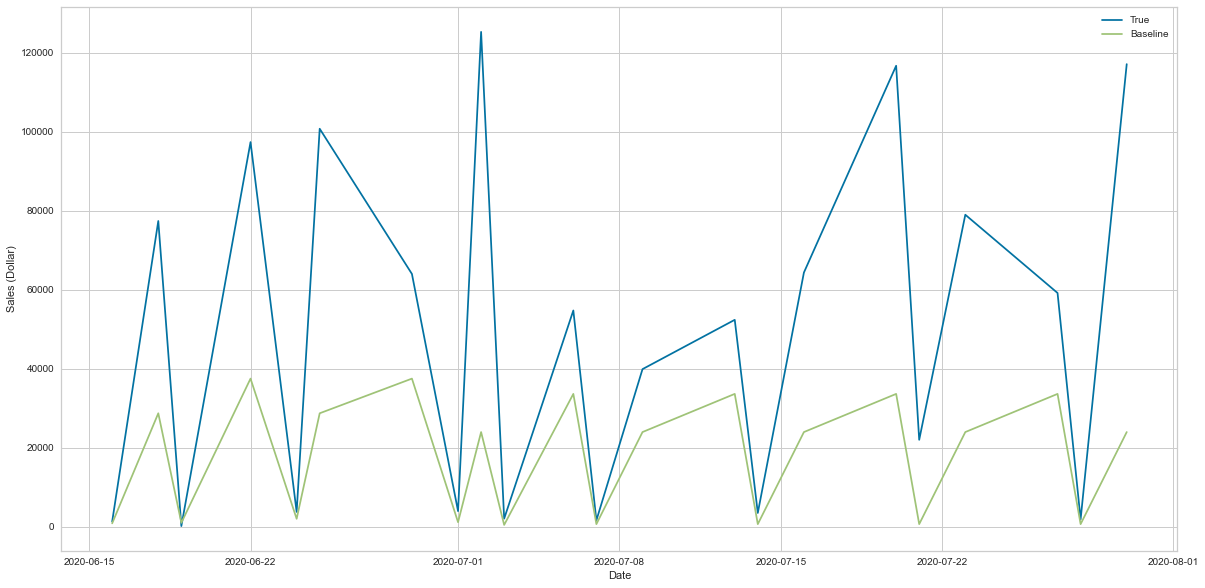

In [107]:
plt.figure(figsize=(20,10))
plot_series(test.index, test['sale_dollars'],"True")
#plot_series(train['ds'],train['y'])
plot_series(test.index, unseen_predictions['Label'],"Baseline")

Introducing a new metric, SMAPE - this works really well when there are a lot of 0's in the data - like this one. Please note, 0 is not a missing value

In [108]:
def calc_smape(y_hat, y):
        return 100/len(y) * np.sum(2 * np.abs(y_hat - y) / (np.abs(y) + np.abs(y_hat)))


In [109]:
calc_smape(test['sale_dollars'].values,unseen_predictions['Label'].values)

93.63056966934592

We will consider 78.3 as our baseline SMAPE 

## Blending Models
We will now create a blend model using four algorithms, huber, random forest, xgboost and lightgbm

In [112]:
#huber = create_model('huber', verbose = False)

In [113]:
rf = create_model('rf', verbose = False)

In [114]:
lightgbm = create_model('lightgbm', verbose = False)

In [116]:
#xgb = create_model('xgboost',verbose=False)

In [117]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24089.1709,1148485813.8103,33889.3171,0.4461,1.0518,0.3093
1,21378.0209,1090681287.8239,33025.4642,0.5920,1.1624,0.5114
2,21237.0073,900044629.7238,30000.7438,0.6892,0.8382,1.4121
3,15000.0719,475044926.2568,21795.5254,0.7659,1.7103,9.2492
4,29507.0498,1716977773.8679,41436.4305,0.1681,1.4506,2.3709
5,23741.7851,1141774696.6824,33790.1568,0.4628,0.9431,3.1995
6,26397.8647,2000819568.0558,44730.5217,0.2933,1.6999,7.2914
7,23056.9056,1114371972.5317,33382.2104,0.7186,1.4858,25.5147
8,17663.3845,1105174849.7402,33244.1702,0.6386,1.8070,49.1844
9,22982.1656,1024571381.6337,32008.9266,0.6799,1.1383,2.7528


In [118]:
#tuned_huber = tune_model(huber)

In [119]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27330.6513,1417474552.1253,37649.3632,0.3164,0.8210,0.4434
1,21400.8412,938059218.9644,30627.7524,0.6491,1.0425,1.9662
2,19447.7313,709897564.8254,26643.9030,0.7549,1.0703,5.1769
3,13355.3704,458361949.6097,21409.3893,0.7741,1.8044,9.9249
4,32455.1509,1897032202.4774,43554.9332,0.0809,1.5847,7.0508
5,28690.3695,1302233950.9859,36086.4788,0.3873,1.1388,8.5949
6,26683.1991,1894661106.1010,43527.7050,0.3308,2.0203,11.9057
7,27913.9467,1596964198.1600,39962.0345,0.5967,1.6124,30.2175
8,20641.9513,1248760756.7798,35337.8092,0.5916,1.9653,48.3350
9,22902.7173,1210174605.2757,34787.5639,0.6219,1.2631,6.7533


In [120]:
#tuned_xgb = tune_model(xgb)

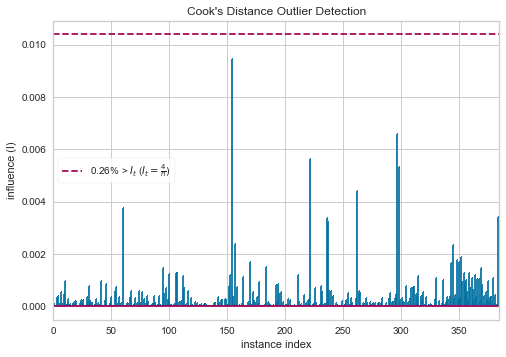

IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 43 iterations
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/thom/venvs/pycaret37/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-124-fc80c0a97cba>", line 15, in <module>
    plot_model(tuned_lightgbm,plot=pt)
  File "/mnt/c8c20bab-7445-45b1-b260-86f1a92c7b20/repos/pycaret/pycaret/regression.py", line 1503, in plot_model
    display_format=display_format
  File "/mnt/c8c20bab-7445-45b1-b260-86f1a92c7b20/repos/pycaret/pycaret/internal/tabular.py", line 7212, in plot_model
    pass
  File "/mnt/c8c20bab-7445-45b1-b260-86f1a92c7b20/repos/pycaret/pycaret/internal/tabular.py", line 6667, in rfe
    sizes = np.linspace(0.3, 1.0, 10)
  File "/mnt/c8c20bab-7445-45b1-b260-86f1a92c7b20/repos/pycaret/pycaret/internal/plots/yellowbrick.py", line 88, in show_yellowbrick_plot
    visualizer.fit(X_train, y_train, **fit_kwargs_and_kwargs)
  File "/home/thom/venvs/pycaret37/lib/python3.7/site-packages

TypeError: object of type 'NoneType' has no len()

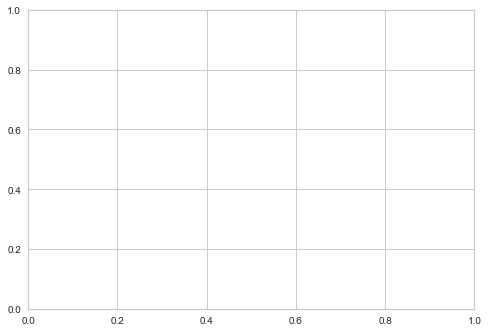

In [124]:
for pt in [
    'residuals_interactive',
        'residuals',
        'error',
        'cooks',
        'rfe',
        'learning',
        'vc',
        'manifold',
        'feature',
        'feature_all',
        'parameter',
        'tree'
]:
    plot_model(tuned_lightgbm,plot=pt)

The below script will just blend all the four models in to one - the time savings are phenomenal

In [125]:
blend_specific = blend_models(estimator_list = [
    tuned_rf,
    tuned_lightgbm,
    #tuned_xgb,
    #tuned_huber
])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24928.1727,1247947867.9271,35326.3056,0.3981,0.8612,0.3400
1,19800.1620,980745455.8848,31316.8558,0.6331,0.9783,0.9416
2,19884.4907,757652383.3814,27525.4861,0.7384,0.9483,2.8078
3,13660.5226,433488037.9181,20820.3755,0.7864,1.6114,9.4486
4,29794.2767,1734374120.4107,41645.8176,0.1597,1.4868,4.1049
5,26118.4418,1156772274.3850,34011.3551,0.4557,1.0420,5.4823
6,26148.6772,1922419408.9563,43845.4035,0.3210,1.8676,9.1625
7,25023.4031,1322166489.5811,36361.6074,0.6661,1.5450,27.7311
8,18759.4110,1132707864.2627,33655.7256,0.6296,1.8750,48.6286
9,22094.0783,1039505510.5450,32241.3633,0.6752,1.1536,4.3230


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 11
INFO:logs:PowerTransformedTargetRegressor(estimators=[('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mae',
                                                                   max_depth=10,
                                                                   max_features=1.0,
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0002,
                                                                   min_impurity_split=None,
                                                        

In [126]:
predict_model(blend_specific);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(estimators=[('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mae',
                                                                   max_depth=10,
                                                                   max_features=1.0,
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0002,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=2,
            

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,18400.5489,663849316.0294,25765.2735,0.7681,1.9834,679333.6669


In [127]:
final_model = finalize_model(blend_specific)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=PowerTransformedTargetRegressor(estimators=[('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mae',
                                                                   max_depth=10,
                                                                   max_features=1.0,
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0002,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=2,
          

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 13
INFO:logs:PowerTransformedTargetRegressor(estimators=[('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mae',
                                                                   max_depth=10,
                                                                   max_features=1.0,
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0002,
                                                            

In [128]:
unseen_predictions_2 = predict_model(final_model, data=test, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(estimators=[('rf',
                                             RandomForestRegressor(bootstrap=True,
                                                                   ccp_alpha=0.0,
                                                                   criterion='mae',
                                                                   max_depth=10,
                                                                   max_features=1.0,
                                                                   max_leaf_nodes=None,
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0002,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=2,
            

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,flag,sale_dollars,Label
date,,,,,,,,,,
2020-06-16,1,2,6,2020,168,16,25,1,1376.22,742.077537
2020-06-18,3,2,6,2020,170,18,25,1,77424.58,49478.457670
2020-06-19,4,2,6,2020,171,19,25,1,226.68,1741.636782
2020-06-22,0,2,6,2020,174,22,26,1,97385.87,56031.736950
2020-06-24,2,2,6,2020,176,24,26,1,3810.90,1657.566324


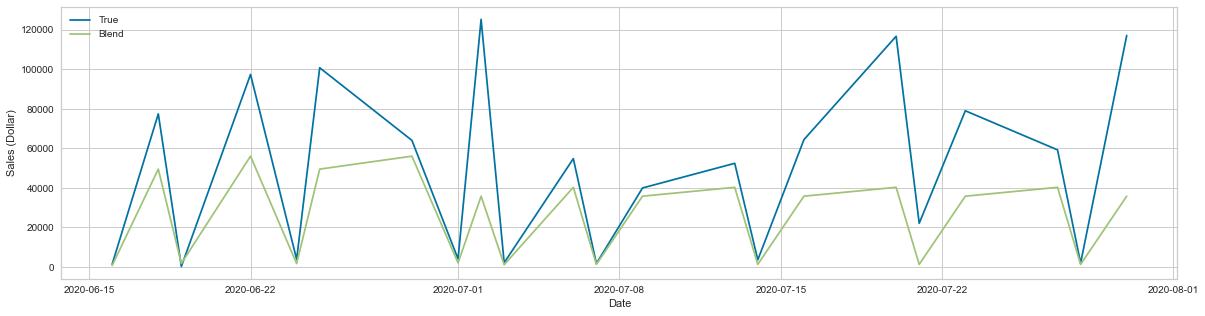

In [129]:
plt.figure(figsize=(20,5))
plot_series(test.index, test['sale_dollars'],"True")
plot_series(test.index, unseen_predictions_2['Label'],'Blend')

In [130]:
calc_smape(test['sale_dollars'].values,unseen_predictions_2['Label'].values)

67.77105361811596

The blend model is a major improvment over the baseline model.

## Stacking
Let's try one more technique, stacking and see if it improves our results

In [132]:
stack_1 = stack_models([
    tuned_rf,
    #tuned_xgb,
    tuned_lightgbm
])
predict_model(stack_1);
final_stack_1 = finalize_model(stack_1)
unseen_predictions_3 = predict_model(final_stack_1, data=test, )

INFO:logs:Initializing stack_models()
INFO:logs:stack_models(estimator_list=[PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                                max_depth=10, max_features=1.0,
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0002,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=10,
                                min_weight_fraction_leaf=0.0, n_estimators=230,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power_...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criterion='mae',
                         

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:12:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Bayesian Ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Getting model names
INFO:logs:[('rf', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=230, n_jobs=-1, oob_score=False,
                      random_state=1141, verbose=0, warm_start=False)), ('lightgbm', LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=21, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=250, n_jobs=-1, num_leaves=60, objective=None,
              random_state=114

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
unseen_predictions_3.loc[unseen_predictions_3['Label'] < 0, 'Label'] = 0
unseen_predictions_3.head(4)

In [ ]:
calc_smape(test['sale_dollars'].values,unseen_predictions_3['Label'].values)

Stacking definitely did not improve the model

In [ ]:
plt.figure(figsize=(20,5))
plot_series(test.index, test['sale_dollars'],"True")
plot_series(test.index, unseen_predictions['Label'],'Baseline')
plot_series(test.index, unseen_predictions_2['Label'],'Blend')
plot_series(test.index, unseen_predictions_3['Label'],'Stacking')

#Next Steps
The model isn't complete as yet - we can always go back to create a combination of new models + features 